<a href="https://colab.research.google.com/github/NicTacToe/Data-Science-using-Python/blob/main/Skill_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Science using Python**


---



Hello ma'ams, sirs and whoever might be checking my Skill LCA-3.

I'm Nicket, and I'll walk you through my project to help you understand what I'm doing here (and also because these models take forever to fit and I'm trying to pass the time). Let's get started!

## Step 1: Getting Started

### Importing the Datasets

Over here, I'm importing the basic libraries and the four datasets I'll be working on.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
csv_files = [
    '/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

### Merging the Datasets

I'm going to merge the four datasets into one massive dataset.

In [ ]:
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

This dataset is based on PCAPs (basically recordings of network activity) of network traffic, as well as the types of attacks that can occur. The target features are the categories of attacks (DoS, DDoS, etc.) as well as their subcategories (UDP, TCP, etc.)

In [ ]:
merged_df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960.0,192.168.100.7,80.0,...,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1.0,192.168.100.147,-1.0,...,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962.0,192.168.100.7,80.0,...,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964.0,192.168.100.7,80.0,...,1.12704,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966.0,192.168.100.7,80.0,...,1.12704,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219270,3054692,1.528099e+09,e,1,udp,3,192.168.100.148,22279.0,192.168.100.3,80.0,...,0.64822,100.0,29.0,0.802706,0.648220,816.0,319.0,1.0,DDoS,UDP
219271,3054693,1.528099e+09,e,1,udp,3,192.168.100.148,22280.0,192.168.100.3,80.0,...,0.64822,100.0,29.0,0.802706,0.648220,816.0,319.0,1.0,DDoS,UDP
219272,3054694,1.528099e+09,e,1,udp,3,192.168.100.148,22281.0,192.168.100.3,80.0,...,0.64822,100.0,29.0,0.802706,0.648220,816.0,319.0,1.0,DDoS,UDP
219273,3054695,1.528099e+09,e,1,udp,3,192.168.100.148,22282.0,192.168.100.3,80.0,...,0.64822,100.0,29.0,0.802706,0.648220,816.0,319.0,1.0,DDoS,UDP


I ask for the row count to confirm the merge.

In [ ]:
print("Total rows after concatenation:", len(merged_df))

Total rows after concatenation: 219275


### Trimming Dataset to 100k rows

Now obviously, 3.6 million rows is WAY too much for anyone to reasonably handle. So, I'll randomly take 100,000 rows to use as my main dataset. It may not be 100% accurate, but I'd much rather allow a little error if it keeps me sane.

In [ ]:
trimmed_df = merged_df.sample(n=100000, random_state=42)

In [ ]:
trimmed_df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
196358,3031780,1.528099e+09,e,1,udp,3,192.168.100.147,22086.0,192.168.100.3,80.0,...,0.982528,100.0,61.0,1.098080,0.982528,1344.0,915.0,1.0,DDoS,UDP
183299,3018721,1.528099e+09,e,1,udp,3,192.168.100.148,9352.0,192.168.100.3,80.0,...,0.911469,100.0,63.0,0.802321,0.911469,1248.0,693.0,1.0,DDoS,UDP
131923,2019145,1.528096e+09,e s,2,tcp,1,192.168.100.148,7009.0,192.168.100.3,80.0,...,0.394069,100.0,71.0,0.339838,0.394069,270.0,125.0,1.0,DDoS,TCP
111043,1050335,1.528085e+09,e,1,udp,3,192.168.100.150,11806.0,192.168.100.3,80.0,...,0.483820,100.0,100.0,0.483820,0.483820,1300.0,1300.0,1.0,DoS,UDP
158915,2046137,1.528096e+09,e s,2,tcp,1,192.168.100.150,44022.0,192.168.100.3,80.0,...,0.369790,100.0,72.0,0.407038,0.369790,318.0,318.0,1.0,DDoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159560,2046782,1.528096e+09,e s,2,tcp,1,192.168.100.147,45894.0,192.168.100.3,80.0,...,0.351187,100.0,54.0,0.361557,0.351187,500.0,270.0,1.0,DDoS,TCP
134466,2021688,1.528096e+09,e s,2,tcp,1,192.168.100.149,50696.0,192.168.100.3,80.0,...,0.570676,100.0,100.0,0.570428,0.570676,900.0,900.0,1.0,DDoS,TCP
67610,1006902,1.528085e+09,e,1,udp,3,192.168.100.149,27282.0,192.168.100.5,80.0,...,0.269137,100.0,100.0,0.269137,0.269137,700.0,700.0,1.0,DoS,UDP
196976,3032398,1.528099e+09,e,1,udp,3,192.168.100.150,40712.0,192.168.100.3,80.0,...,0.663603,100.0,85.0,0.577006,0.663603,820.0,595.0,1.0,DDoS,UDP


Again, confirming the trimming process worked:

In [ ]:
print("Total rows after concatenation:", len(trimmed_df))

Total rows after concatenation: 100000


### Exporting the Reduced Dataset

At this point, you could start working on the trimmed dataset immediately, but there's a small step we'll throw in first.

You see, you aren't the only person in the world (shocking, I know) - other people may want to access your trimmed dataset as well. It would be real handy if you had it in a .csv form so they can download it and work on the data themselves.

In [ ]:
trimmed_df.to_csv('reduced_dataset.csv', index=False)

In [ ]:
df = pd.read_csv('reduced_dataset.csv')

### Displaying Statistical Info

I'll just ask for some basic statistical info on my dataset, in case I ever need to troubleshoot any errors like outliers or incorrect typing (spoiler alert: those came a lot!)

In [ ]:
df.describe()

,pkSeqID,stime,flgs_number,proto_number,sport,dport,pkts,bytes,state_number,ltime,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,...,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.0
mean,1.493867e+06,1.528090e+09,1.599480,1.979730,25586.148361,79.995950,8.326073,727.911859,3.138421,1.528090e+09,...,832.267335,0.869384,0.767836,91.971959,82.752605,0.783752,0.727246,720.790896,652.453909,1.0
std,1.140196e+06,7.480702e+03,0.789715,0.999775,18290.875701,0.572748,3.602195,195.226543,1.085368,7.473452e+03,...,341.264111,73.381740,56.719333,18.402690,23.939327,59.822283,57.154834,412.469838,399.445986,0.0
min,1.000000e+00,1.528081e+09,1.000000,1.000000,-1.000000,-1.000000,2.000000,120.000000,1.000000,1.528081e+09,...,2.000000,0.124463,0.003857,1.000000,1.000000,0.005142,0.005142,2.000000,2.000000,1.0
25%,5.523525e+04,1.528081e+09,1.000000,1.000000,9627.500000,80.000000,5.000000,616.000000,3.000000,1.528081e+09,...,531.000000,0.254345,0.254345,100.000000,69.000000,0.254903,0.221464,400.000000,355.000000,1.0
50%,1.049510e+06,1.528085e+09,2.000000,1.000000,20376.000000,80.000000,7.000000,770.000000,3.000000,1.528085e+09,...,700.000000,0.401498,0.401503,100.000000,100.000000,0.403995,0.395327,600.000000,512.000000,1.0
75%,3.000545e+06,1.528099e+09,2.000000,3.000000,39711.500000,80.000000,11.000000,840.000000,4.000000,1.528099e+09,...,1100.000000,0.575813,0.577023,100.000000,100.000000,0.576966,0.577010,1100.000000,946.000000,1.0
max,3.054696e+06,1.528099e+09,6.000000,3.000000,65535.000000,80.000000,56.000000,6999.000000,7.000000,1.528099e+09,...,1500.000000,15748.000000,13245.000000,100.000000,100.000000,13245.000000,13245.000000,1500.000000,1500.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pkSeqID                           100000 non-null  int64  
 1   stime                             100000 non-null  float64
 2   flgs                              100000 non-null  object 
 3   flgs_number                       100000 non-null  int64  
 4   proto                             100000 non-null  object 
 5   proto_number                      100000 non-null  int64  
 6   saddr                             100000 non-null  object 
 7   sport                             99999 non-null   float64
 8   daddr                             99999 non-null   object 
 9   dport                             99999 non-null   float64
 10  pkts                              99999 non-null   float64
 11  bytes                             99999 non-null   fl

## Step 2: Preprocess the Data

This part is, admittedly, a little boring, but it's very important that I preprocess the data before doing ANYTHING with it. Pretty much anything data science related assumes that the data provided is clean and balanced, so I have to make sure that's the case before moving on.

### Dealing with NaN and NULL Values

(Editor's note: This part was VERY annoying)

I'll just do some checks here to see if any NaN or NULL values exist.

In [ ]:
df.isna().sum()

,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,1
daddr,1
dport,1


In [ ]:
df.isnull().sum()

,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,1
daddr,1
dport,1


So here's the tedious part: Two features, the 'sport' and 'dport' ones, have mixed data: they're both supposed to be numerical columns, but some of the data is encased in "quotes", effectively making them strings. I'll have to fix that before moving on.

In [ ]:
df['sport'] = df['sport'].astype(str)
df['dport'] = df['dport'].astype(str)

df['sport'] = pd.to_numeric(df['sport'].str.replace('"', ''), errors='coerce')
df['dport'] = pd.to_numeric(df['dport'].str.replace('"', ''), errors='coerce')

That's not all though: some values are also not present, but instead of displaying them as NaN, the *genius* who made this dataset displayed them as -1. We'll have to correct this too.

In [ ]:
df['sport'] = df['sport'].replace(-1, np.nan)
df['dport'] = df['dport'].replace(-1, np.nan)

After all that out of the way, we can finally work on the NaN and NULL values. Rather than dropping perfectly good rows because of one column, I opted to replace them with the mean value of that column.

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().any() or df[col].isna().any():
        df.loc[:, col] = df[col].fillna(df[col].mean())

df = df.dropna(axis=0, how='any', inplace=False)

Checking to confirm NaN and NULL values are dealt with:

In [ ]:
df.isna().sum()

,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0
dport,0


In [ ]:
df.isnull().sum()

,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0
dport,0


### Dealing with Duplicate Data

Checking if any duplicate values exist:

In [ ]:
df.duplicated().sum()

np.int64(0)

### Dealing with Outliers

Outliers can bias the information in a feature, leading to any algorithms using that feature to make innaccurate predictions. Below, I collected all the numerical columns in the dataset and corrected their outlier values using the capping technique.

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  df.loc[:, col] = np.clip(df[col], q1 - 1.5 * iqr, q3 + 1.5 * iqr)

<ipython-input-33-a6dfd0706111>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 2. ... 1. 1. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = np.clip(df[col], q1 - 1.5 * iqr, q3 + 1.5 * iqr)


Confirming that the outliers are dealt with:

In [ ]:
df.describe()

,pkSeqID,stime,flgs_number,proto_number,sport,dport,pkts,bytes,state_number,ltime,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,9.999800e+04,9.999800e+04,99998.000000,99998.000000,99998.000000,99998.0,99998.000000,99998.000000,99998.000000,9.999800e+04,...,99998.000000,99998.000000,99998.000000,99998.0,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.0
mean,1.493856e+06,1.528090e+09,1.551566,1.979710,25587.554022,80.0,8.325627,722.893178,3.226160,1.528090e+09,...,832.267335,0.459899,0.461887,100.0,82.944209,0.459747,0.463666,720.790896,652.453909,1.0
std,1.140196e+06,7.480702e+03,0.593767,0.999774,18290.028663,0.0,3.599075,165.913595,0.914369,7.473471e+03,...,341.264111,0.286635,0.285454,0.0,23.405753,0.287806,0.288815,412.469838,399.445986,0.0
min,1.000000e+00,1.528081e+09,1.000000,1.000000,1.000000,80.0,2.000000,280.000000,1.500000,1.528081e+09,...,2.000000,0.124463,0.003857,100.0,22.500000,0.005142,0.005142,2.000000,2.000000,1.0
25%,5.523375e+04,1.528081e+09,1.000000,1.000000,9629.000000,80.0,5.000000,616.000000,3.000000,1.528081e+09,...,531.000000,0.254345,0.254345,100.0,69.000000,0.254903,0.221464,400.000000,355.000000,1.0
50%,1.049506e+06,1.528085e+09,2.000000,1.000000,20377.500000,80.0,7.000000,770.000000,3.000000,1.528085e+09,...,700.000000,0.401498,0.401503,100.0,100.000000,0.403995,0.395327,600.000000,512.000000,1.0
75%,3.000544e+06,1.528099e+09,2.000000,3.000000,39711.750000,80.0,11.000000,840.000000,4.000000,1.528099e+09,...,1100.000000,0.575813,0.577023,100.0,100.000000,0.576966,0.577010,1100.000000,946.000000,1.0
max,3.054695e+06,1.528099e+09,3.500000,3.000000,65535.000000,80.0,20.000000,1176.000000,5.500000,1.528099e+09,...,1500.000000,1.058015,1.061040,100.0,100.000000,1.060061,1.110329,1500.000000,1500.000000,1.0


## Step 3: Exploratory Data Analysis

Alright, time for the fun stuff! I'll make some graphs using features from the dataset to get an idea of the relationships and proportions of the data.

But first, we need to import the libraries for data visualization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Next, we need to see what features exist in the dataset. This alone can usually give us an idea of what the data is about, which features are most important, and which features are closely related with each other.

In [ ]:
df.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

### Pie Chart

'subcategory' is a categorical feature, which contains several different categories about the protocols used in network attacks (UDP, TCP, etc.)

In [ ]:
subcat_names = df["subcategory"].value_counts().index

In [ ]:
subcat_vals = df["subcategory"].value_counts().values

After obtaining the subcategory names and their values, we can plot that information on a pie chart.

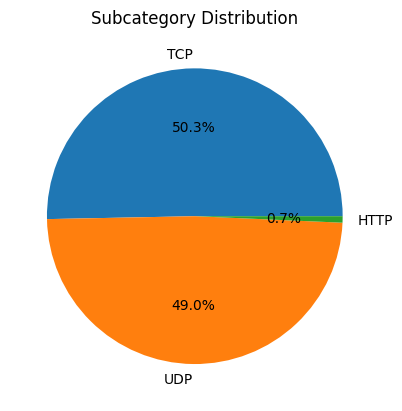

In [ ]:
plt.pie(subcat_vals, labels=subcat_names, autopct='%1.1f%%')
plt.title('Subcategory Distribution')
plt.show()

As you can see above, the protocol mainly used during network attacks is UDP, followed closely by TCP.

### Bar Plot

In this plot, I'm comparing both packets and bytes against their protocols.

I'll first merge 'pkts' and 'bytes' together on the x-axis, and then group them per protocol.

In [ ]:
melted_df = pd.melt(df, id_vars=['proto'], value_vars=['pkts', 'bytes'])

Now that that's done, we can proceed with making the bar plot.

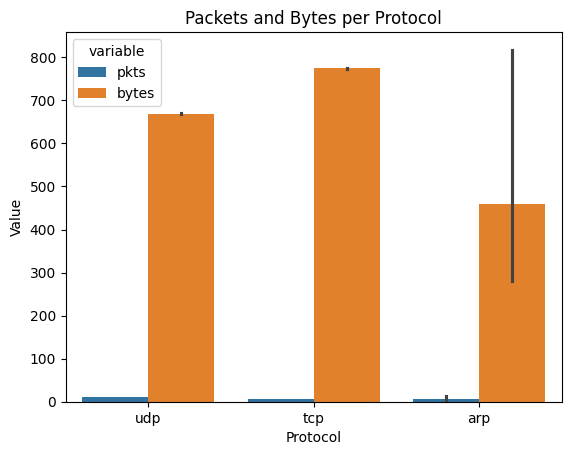

In [ ]:
sns.barplot(x='proto', y='value', hue='variable', data=melted_df)
plt.title('Packets and Bytes per Protocol')
plt.xlabel('Protocol')
plt.ylabel('Value')
plt.show()

From the results, we can see that the number of bytes sent greatly outnumbers the number of packets sent: which makes sense, since packets are basically just collections of many bytes.

We can see that TCP involves the largest amount of bytes, followed by UDP, then ARP and lastly ICMP.

### Histogram

In this plot, I'm comparing the duration of network connections with their frequency.

Durations in this context refers to how long communications are held between two devices on a network, from the first packet to the last. Think of it as a call between two friends: duration is how long the call lasts.

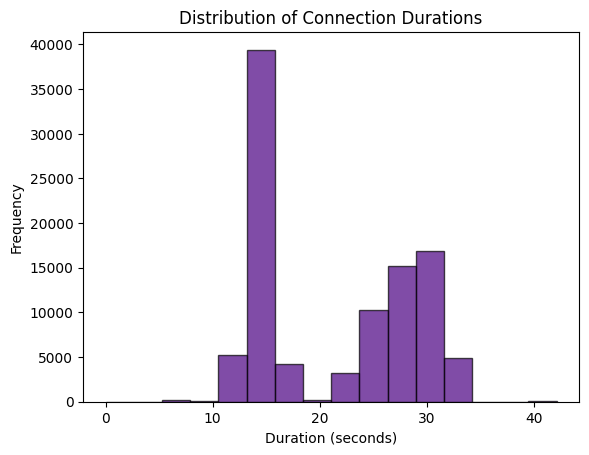

In [ ]:
plt.hist(df['dur'], bins=16, color='indigo', edgecolor='black', alpha=0.7)

plt.title('Distribution of Connection Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

From the above histogram, we can see the average duration of a network communication was roughly 14 seconds, with some occurances at 12 seconds and 27 seconds.

### Box Plot

Over here, I want to see the spread of data between subcatgories of data packets. This way, I'll be able to identify the median duration, as well as the quartiles, the extreme values and any outliers if present.

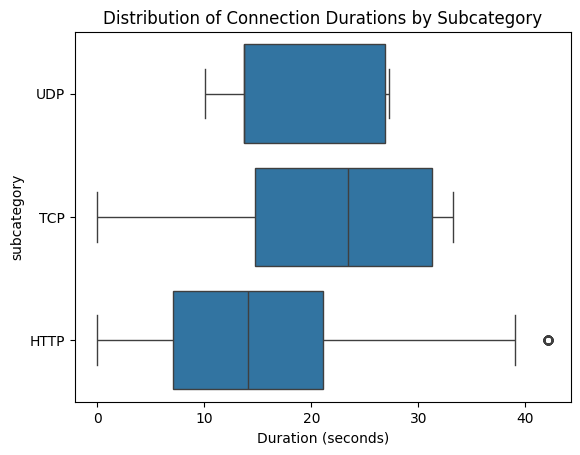

In [ ]:
sns.boxplot(x='dur', y='subcategory', data=df)
plt.title('Distribution of Connection Durations by Subcategory')
plt.xlabel('Duration (seconds)')
plt.ylabel('subcategory')
plt.show()

From the box plots, we can see the median durations of several protocols like UDP, TCP and HTTP, as well as the interquartile range for each protocol.

### Scatter Plot

I'm noticing that 'pkts' and 'bytes' are fairly related: any changes in one of them usually impacts the other.

To investigate this further, I'll set up a scatter plot to examine this visually.

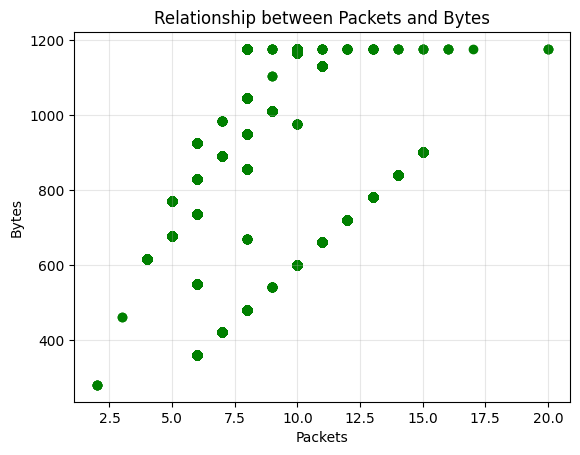

In [ ]:
plt.scatter(df['pkts'], df['bytes'], c="green")
plt.title('Relationship between Packets and Bytes')
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.grid(alpha=0.3 )
plt.show()

As I predicted, packets and bytes definitely have a strong positive correlation. This could be useful...

## Step 4: Encoding Data

When we build machine learning models, they can only really understand numbers - not categories like "red," "blue," or "green." If you feed raw text or labels into a model without converting them, it just won’t know what to do. It's like trying to do math with colors - it makes no sense to the computer.

Data encoding is basically the process where we turn all those non-numerical things into numbers so the model can actually process them and learn from them.

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in object_cols:
    if df[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed data types.")
    else:
        df.loc[:, col] = le.fit_transform(df[col])

What I did above was import an encoding algorithm to encode categorical features into numerical ones for the computer to understand.

There's actually several encoding algorithms out there, like One-Hot and Target, but Label encoding fits our needs well enough since the data isn't in any kind of hierarchy or order.

In [ ]:
df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3031780,1.528099e+09,0,1.0,2,3,0,22086.0,3,80.0,...,0.982528,100.0,61.0,1.060061,0.982528,1344.0,915.0,1.0,0,2
1,3018721,1.528099e+09,0,1.0,2,3,1,9352.0,3,80.0,...,0.911469,100.0,63.0,0.802321,0.911469,1248.0,693.0,1.0,0,2
2,2019145,1.528096e+09,4,2.0,1,1,1,7009.0,3,80.0,...,0.394069,100.0,71.0,0.339838,0.394069,270.0,125.0,1.0,0,1
3,1050335,1.528085e+09,0,1.0,2,3,3,11806.0,3,80.0,...,0.483820,100.0,100.0,0.483820,0.483820,1300.0,1300.0,1.0,1,2
4,2046137,1.528096e+09,4,2.0,1,1,3,44022.0,3,80.0,...,0.369790,100.0,72.0,0.407038,0.369790,318.0,318.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2046782,1.528096e+09,4,2.0,1,1,0,45894.0,3,80.0,...,0.351187,100.0,54.0,0.361557,0.351187,500.0,270.0,1.0,0,1
99996,2021688,1.528096e+09,4,2.0,1,1,2,50696.0,3,80.0,...,0.570676,100.0,100.0,0.570428,0.570676,900.0,900.0,1.0,0,1
99997,1006902,1.528085e+09,0,1.0,2,3,2,27282.0,4,80.0,...,0.269137,100.0,100.0,0.269137,0.269137,700.0,700.0,1.0,1,2
99998,3032398,1.528099e+09,0,1.0,2,3,3,40712.0,3,80.0,...,0.663603,100.0,85.0,0.577006,0.663603,820.0,595.0,1.0,0,2


## Step 5: Standardization

Standardization is the process of making sure all your features are on the same playing field. Some features might have huge numbers (like salary in dollars) and others tiny numbers (like height in meters). If you don't standardize, the model might think the bigger numbers are more important just because they're bigger.

So we standardize - basically shrink and shift the data - so everything has a mean of 0 and a standard deviation of 1. Makes the training way smoother and the model way smarter.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64']).columns
scaled_df = df.copy()
scaled_df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaled_df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3031780,1.223666,0,-0.928932,2,3,0,-0.191447,3,0.0,...,1.823916,0.0,-0.937561,2.085835,1.796532,1.510928,0.657279,0.0,0,2
1,3018721,1.223660,0,-0.928932,2,3,1,-0.887677,3,0.0,...,1.574981,0.0,-0.852111,1.190300,1.550494,1.278183,0.101506,0.0,0,2
2,2019145,0.743501,4,0.755240,1,1,1,-1.015780,3,0.0,...,-0.237580,0.0,-0.510313,-0.416633,-0.240975,-1.092912,-1.320470,0.0,0,1
3,1050335,-0.699306,0,-0.928932,2,3,3,-0.753505,3,0.0,...,0.076837,0.0,0.728704,0.083644,0.069783,1.404253,1.621119,0.0,1,2
4,2046137,0.743553,4,0.755240,1,1,3,1.007901,3,0.0,...,-0.322634,0.0,-0.467589,-0.183141,-0.325039,-0.976539,-0.837299,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2046782,0.743554,4,0.755240,1,1,0,1.110252,3,0.0,...,-0.387804,0.0,-1.236634,-0.341168,-0.389451,-0.535292,-0.957466,0.0,0,1
99996,2021688,0.743505,4,0.755240,1,1,2,1.372801,3,0.0,...,0.381112,0.0,0.728704,0.384570,0.370517,0.434480,0.619727,0.0,0,1
99997,1006902,-0.699384,0,-0.928932,2,3,2,0.092644,4,0.0,...,-0.675243,0.0,0.728704,-0.662289,-0.673545,-0.050406,0.119031,0.0,1,2
99998,3032398,1.223666,0,-0.928932,2,3,3,0.826927,3,0.0,...,0.706655,0.0,0.087833,0.407425,0.692272,0.240526,-0.143835,0.0,0,2


## Step 6: Feature Selection

Now that the computer can actually understand what our data is about, it's time for one of the biggest parts of any data science project: seperating the stuff that matters from the stuff that doesn't.

By focusing on the most useful information, your model becomes faster, simpler, and usually performs much better.

There are three main methods we can use, and I'll go over each one of them along with an example for each.

### Filter Method: Mutual Information

Filter methods involve ranking features based on their relationship with the target, without using any machine learning model. They’re quick, simple, and help you get rid of the irrelevant stuff before even thinking about training.

This specific method involves finding the information gain (how much useful information can be obtained) of each feature in the dataset, and will print ten features that have the highest IG scores.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

We'll use 'attack' as our target variable, so let's set that as y, and every other column as X.

In [ ]:
X = scaled_df.drop('attack', axis=1)
y = scaled_df['attack']

Let's calculate the information gain of all tthe features in the dataset:

In [ ]:
info_gain = mutual_info_classif(X, y)

In [ ]:
sorted_features = sorted(zip(X.columns, info_gain), key=lambda x: x[1], reverse=True)

In [ ]:
print("Feature Information Gain Scores:")
for feature, score in sorted_features[:10]:
    print(f"{feature}: {score:.4f}")

Feature Information Gain Scores:
category: 0.0169
proto: 0.0156
flgs: 0.0147
proto_number: 0.0118
daddr: 0.0098
subcategory: 0.0080
flgs_number: 0.0072
state: 0.0072
min: 0.0060
state_number: 0.0053


Over here, we can see that the feature 'N_IN_Conn_P_DstIP' had the highest IG score, followed by 'subcategory', then 'proto_number', etc.

### Wrapper Method: Forward Sequential Selection

Wrapper methods select features by actually training a model and seeing which combinations of features work best. They’re slower than filter methods but usually give better results because they’re customized to the model you’re using.

This specific wrapper method involves iteratively increasing the number of features chosen until the added features stop greatly impacting the performance.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

We'll take a sample of the data here, so we won't have to wait all day for the model to fit.

In [ ]:
df_sampled = df.sample(n=5000, random_state=42)

Let's set all the numerical features as X, and the 'subcategory' feature as y (after encoding it, of course).

In [ ]:
le = LabelEncoder()

X = df_sampled.select_dtypes(include='number')

df_sampled['subcategory_encoded'] = le.fit_transform(df_sampled['subcategory'])
y = df_sampled['subcategory_encoded']

In [ ]:
model = LogisticRegression(max_iter=1000)

I'll configure the model to select no more than 10 features, use the forward selection method, use 3-fold cross-validation to ensure the quality of feature selections, and to use all of the CPU cores to speed up the fitting.

In [ ]:
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=10,
    direction='forward',
    cv=StratifiedKFold(n_splits=3),
    n_jobs=-1
)

Finally, let's fit the model.

In [ ]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                          estimator=LogisticRegression(max_iter=1000),
                          n_features_to_select=10, n_jobs=-1)

In [ ]:
selected_features = X.columns[sfs.get_support()].tolist()
print(" Features selected by Forward Selection:\n", selected_features)

 Features selected by Forward Selection:
 ['pkSeqID', 'flgs_number', 'proto_number', 'sport', 'dport', 'pkts', 'bytes', 'state_number', 'seq', 'dur']


As displayed above, the features above are what the model recommends as the most useful features.

### Embedded Method: Elastic Net Regression

Embedded methods perform feature selection during the model training process, meaning they select features as part of the training. They evaluate the importance of each feature based on the model's performance and automatically eliminate less important ones.

Elastic Net Regression performs feature selection by penalizing both the L1 (Lasso) and L2 (Ridge) regularization terms, helping it choose the most important features while avoiding overfitting.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Again, I'm passing arguments to the model to select our embedded method of choice, as well as other parameters that best suit our needs.

In [ ]:
elastic = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    l1_ratios=[0.9],
    Cs=[0.01, 0.1, 1],
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    n_jobs=-1
)

Time to fit our model.

In [ ]:
elastic.fit(X_scaled, y)

LogisticRegressionCV(Cs=[0.01, 0.1, 1], cv=5, l1_ratios=[0.9], max_iter=5000,
                     n_jobs=-1, penalty='elasticnet', scoring='accuracy',
                     solver='saga')

The model evaluated all of the features and set the coefficients of inefficient features to be close to zero, effectively removing their impact on the final prediction. Now, we just have to select the features with a coefficient greater than 0.01.

In [ ]:
coef = elastic.coef_[0]
selected_features = X.columns[np.abs(coef) > 0.01]

In [ ]:
print(" Selected features by Elastic Net (filtered):")
print(selected_features.tolist())

 Selected features by Elastic Net (filtered):
['pkSeqID', 'flgs_number', 'sport', 'bytes', 'seq', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Dport']


After using our embedded method and applying a lasso penalty function, we're left with five features that the model believes will be the most helpful for future tasks.

## Step 7: Splitting Dataset (Train/Test)

Alright, just one more step until we can start doing those fancy ML models everyone talks about. We'll need to seperate the dataset between training and testing data to accurately develop our model.

The training data is used to...well, train the model, and the tesing data is used for... okay, it's in the name, you can probably figure it out.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

We'll set 'category' as the target variable, and all the important features determined by the feature selection methods as X.

In [ ]:
X = df[['pkts', 'bytes', 'dur', 'rate', 'srate', 'drate', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'proto_number', 'state_number', 'N_IN_Conn_P_DstIP']]
y = df['category']

Now, let's split the data across four variables, two for training and two for testing. We'll split it 80:20, setting random_state as 42 and stratify as y to ensure the proportions reflect the original data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Printing the shape of each variable to ensure splitting occured successfully:

In [ ]:
X_train.shape

(79998, 13)

In [ ]:
X_test.shape

(20000, 13)

In [ ]:
y_train.shape

(79998,)

In [ ]:
y_test.shape

(20000,)

## Step 8: Model Implementation

After ALL that, we can **finally** start making ML models! We'll need to pick a machine learning algorithm, train it on our training data, and then test how well it performs on unseen data.

After fitting the model to the data, I'll check its predictions using metrics like accuracy or error rates to see how accurate it actually is.

### Logistic Regression

For our choice of machine learning model, I've decided to go with a logistic regression model, which, contrary to its name, is a type of classification model. It projects data onto a sigmoid curve and will classify it depending on its location on the curve.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)

Fitting the model to our training data:

In [ ]:
model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(max_iter=1000)

Testing the model on unseen data to see how well it fares:

In [ ]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test_encoded, y_pred)
print(f" Logistic Regression Accuracy: {acc:.4f}")

 Logistic Regression Accuracy: 0.9992


As you can see, the model is able to produce accurate results around 87.99% of the time. This isn't bad, but we can always improve the performance by altering the hyperparameters, including/removing features, or even involving multiple models at once.

We'll use the latter method in the next step.

## Step 9: Ensemble Methods

What's better than one model making predictions on data? TWO models making predictions on data! Or really, any amount of models you might want. That's what ensemble learning is: combining multiple models to make predictions.

We do this to achieve a greater accuracy and robustness than a single model could ever accomplish, by reducing errors and leveraging the strengths of different algorithms.

### Bagging Classifiers

Bagging is actually short for Bootstrap-Aggregating, and it's an ensemble method that trains multiple models on different random subsets of the data, created by sampling with replacement.

Each model in the ensemble makes its own prediction, and the final prediction is typically determined by averaging (for regression) or majority voting (for classification).

In [ ]:
from sklearn.ensemble import BaggingClassifier

I'm setting the base model as logistic regression. I'll have the bagging classifier make ten of these models, each training on 80% of the data with replacement.

In [ ]:
base_model = LogisticRegression(max_iter=1000)

bm = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

Time to train our bagging model on our data.

In [ ]:
bm.fit(X_train_scaled, y_train_encoded)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_samples=0.8,
                  n_jobs=-1, random_state=42)

In [ ]:
y_pred_bag = bm.predict(X_test_scaled)
bagging_acc = accuracy_score(y_test_encoded, y_pred_bag)
print(f" Bagging Accuracy (Logistic Regression): {bagging_acc:.4f}")

 Bagging Accuracy (Logistic Regression): 0.9992


Notice how the accuracy of the model went up?

Bagging helps reduce variance and prevents overfitting, making it especially useful for unstable models like decision trees.











---



**AND THAT'S IT!** I hope I've explained my thought process clearly  and covered everything you wanted me to in this project, while hopefully not boring you too much. This is Nicket Shah, signing off!